In [1]:
import pickle
import numpy as np
import sklearn
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import statistics

In [2]:
def read_file(filename):
    x = pickle._Unpickler(open(filename, 'rb'))
    x.encoding = 'latin1'
    p = x.load()
    return p

In [3]:
files = []
for n in range(1, 5):
    s = ''
    if n < 10:
        s += '0'
    s += str(n)
    files. append(s)
print(files)

['01', '02', '03', '04']


In [4]:
labels = []
data = []

for i in files:
    filename = "s" + i + ".dat"
    trial = read_file(filename)
    labels.append(trial ['labels'])
    data.append(trial['data'])

In [5]:
# Re-shape arrays into desired shapes
labels = np.array(labels)
labels = labels.flatten()
labels = labels.reshape(160, 4)

In [6]:
data= np.array(data)
data = data.flatten()
data = data.reshape(160, 40, 8064)
data.shape

(160, 40, 8064)

In [7]:
print("Etiquetas: ",labels.shape) # trial x Label 
print("Data: ", data.shape) # trial x channel x data

Etiquetas:  (160, 4)
Data:  (160, 40, 8064)


In [8]:
# Extracción de Valencia and Arousal
df_label_range = pd.DataFrame({'Valencia': labels[:,0], 'Arousal': labels[:,1]})
print(df_label_range)
print(df_label_range.describe())

     Valencia  Arousal
0        7.71     7.60
1        8.10     7.31
2        8.58     7.54
3        4.94     6.01
4        6.96     3.92
..        ...      ...
155      2.72     2.76
156      1.00     1.00
157      1.79     1.85
158      1.92     2.96
159      1.86     2.91

[160 rows x 2 columns]
         Valencia     Arousal
count  160.000000  160.000000
mean     5.157062    4.774438
std      2.429886    2.347240
min      1.000000    1.000000
25%      3.082500    2.942500
50%      5.000000    4.465000
75%      7.155000    7.010000
max      9.000000    9.000000


# One hot encoder

In [9]:
# Function, marca 1 a los valores mayores a la media de valencia
def valencia_encoder(trial):
    media = np.mean(labels[:,0])
    if (labels[trial,0] >= media):
        return 1
    else:
        return 0
# Function, marca 1 a los valores mayores a la media de arousal
def arousal_encoder(trial):
    media = np.mean(labels[:,1])
    if (labels[trial,1] >= media):
        return 1
    else:
        return 0

In [10]:
# Normalización de las etiquetas
labels_encoded = []
for i in range (len(labels)):
  labels_encoded.append([valencia_encoder(i), arousal_encoder(i)])
labels_encoded = np.reshape(labels_encoded, (160, 2))
df_labels = pd.DataFrame(data=labels_encoded, columns=["Valencia Positiva", "Arousal Alta"])
print(df_labels)

     Valencia Positiva  Arousal Alta
0                    1             1
1                    1             1
2                    1             1
3                    0             1
4                    1             0
..                 ...           ...
155                  0             0
156                  0             0
157                  0             0
158                  0             0
159                  0             0

[160 rows x 2 columns]


In [11]:
labels_df = pd.DataFrame(df_labels)
labels_df

,Valencia Positiva,Arousal Alta
0,1,1
1,1,1
2,1,1
3,0,1
4,1,0
...,...,...
155,0,0
156,0,0
157,0,0
158,0,0


# 32 canales de señales EEG

In [12]:
eeg_channels = np.array(["Fp1", "AF3", "F3", "F7", "FC5", "FC1", "C3", "T7", "CP5", "CP1", "P3", "P7", "PO3", "O1", "Oz", "Pz", "Fp2", "AF4", "Fz", "F4", "F8", "FC6", "FC2", "Cz", "C4", "T8", "CP6", "CP2", "P4", "P8", "PO4", "O2"])

In [13]:
eeg_data = []
for i in range (len(data)):
  for j in range (len(eeg_channels)):
    eeg_data.append(data[i,j])
eeg_data = np.reshape(eeg_data, (len(data), len(eeg_channels), len(data[0,0])))
print(eeg_data.shape)

(160, 32, 8064)


# Extracción de caracteristicas

In [14]:
print(eeg_data.size)

41287680


In [15]:
mean_data = np.mean(eeg_data, axis= 2)
mean_data.shape

(160, 32)

In [16]:
med_data = np.median(eeg_data, axis= 2)
med_data.shape

(160, 32)

In [17]:
def cambiarValores(arr):
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            if arr[i][j] > 0:
                arr[i][j] = True
            else:
               arr[i][j] = False
    return arr 
cambiarValores(mean_data)

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       [1., 1., 0., ..., 0., 0., 1.]])

In [18]:
meanDF = pd.DataFrame(mean_data)
meanDF

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
156,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
157,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
158,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [19]:
meanDF = meanDF.rename(columns={0: 'Fp1', 1:"AF3", 2:"F3", 3:"F7", 4:"FC5", 5:"FC1", 6:"C3", 7:"T7", 8:"CP5", 9:"CP1", 10:"P3", 11:"P7", 12:"PO3", 13:"O1", 14:"Oz", 15:"Pz", 16:"Fp2", 17:"AF4", 18:"Fz", 19:"F4", 20:"F8", 21:"FC6", 22:"FC2", 23:"Cz", 24:"C4", 25:"T8", 16:"CP6", 27:"CP2", 28:"P4", 29:"P8", 30:"PO4", 31:"O2" })
meanDF

,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,...,FC2,Cz,C4,T8,26,CP2,P4,P8,PO4,O2
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
156,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
157,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
158,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [20]:
data_EGG = pd.merge(labels_df,meanDF, left_index=True, right_index=True)
data_EGG

,Valencia Positiva,Arousal Alta,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,...,FC2,Cz,C4,T8,26,CP2,P4,P8,PO4,O2
0,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1,1,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0,0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
156,0,0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
157,0,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
158,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [21]:
# division de la data
X = data_EGG.iloc[:, 1:]
X

,Arousal Alta,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,...,FC2,Cz,C4,T8,26,CP2,P4,P8,PO4,O2
0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
156,0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
157,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
158,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [22]:
"""ya = data_EGG['Valencia Positiva']
ya"""

"ya = data_EGG['Valencia Positiva']\nya"

In [23]:
y = data_EGG['Valencia Positiva']
y

0      1
1      1
2      1
3      0
4      1
      ..
155    0
156    0
157    0
158    0
159    0
Name: Valencia Positiva, Length: 160, dtype: int32

In [24]:
# importar librerias
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

In [25]:
# Asignamos en las variables x_train, y_train, los datos de entrada (x) y (y) respectivamente
# x_test y y_test, designará el 30% de los datos (mejora muy poco con 25%)
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=70)

# Algoritmos Supervisados

## Bayesiano

In [26]:
modeloBayesiano = GaussianNB()

In [27]:
#entrenamiento
modeloBayesiano.fit(x_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


GaussianNB()

In [28]:
y_pred = modeloBayesiano.predict(x_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        22
           1       0.67      0.67      0.67        18

    accuracy                           0.70        40
   macro avg       0.70      0.70      0.70        40
weighted avg       0.70      0.70      0.70        40



In [30]:
# Evaluar el modelo en los datos de prueba
score = modeloBayesiano.score(x_test, y_test)
score

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.7

In [31]:
from sklearn.model_selection import cross_val_score

# Realizar la validación cruzada en los datos
scores = cross_val_score(modeloBayesiano, X, y, cv=5)

# Imprimir los resultados de la validación cruzada
print("Cross-validation scores:", scores) 
print("Mean score:", scores.mean())

Cross-validation scores: [0.4375  0.6875  0.6875  0.5     0.28125]
Mean score: 0.51875


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

In [32]:
from sklearn.model_selection import learning_curve
# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(modeloBayesiano, X, y, cv=5)

# Imprimir los resultados de la curva de aprendizaje
print("Training sizes:", train_sizes)
print("Training scores:", train_scores.mean(axis=1))
print("Testing scores:", test_scores.mean(axis=1))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

Training sizes: [ 12  41  70  99 128]
Training scores: [0.86666667 0.68292683 0.67142857 0.65858586 0.6515625 ]
Testing scores: [0.44375 0.58125 0.5875  0.54375 0.51875]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

## Arból de Dec

In [33]:
modeloAD = DecisionTreeClassifier()

In [34]:
#entrenamiento
modeloAD.fit(x_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


DecisionTreeClassifier()

In [35]:
y_pred = modeloAD.predict(x_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.73      0.65        22
           1       0.54      0.39      0.45        18

    accuracy                           0.57        40
   macro avg       0.57      0.56      0.55        40
weighted avg       0.57      0.57      0.56        40



In [37]:
#Curva de aprendizaje
# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(modeloAD, X, y, cv=5)

# Imprimir los resultados de la curva de aprendizaje
print("Training sizes:", train_sizes)
print("Training scores:", train_scores.mean(axis=1))
print("Testing scores:", test_scores.mean(axis=1))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

Training sizes: [ 12  41  70  99 128]
Training scores: [1.         0.97073171 0.93142857 0.93939394 0.934375  ]
Testing scores: [0.49375 0.60625 0.5375  0.625   0.60625]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

In [38]:
# Realizar la validación cruzada en los datos
scores = cross_val_score(modeloAD, X, y, cv=5)

# Imprimir los resultados de la validación cruzada
print("Cross-validation scores:", scores) 
print("Mean score:", scores.mean())

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

Cross-validation scores: [0.5625  0.65625 0.59375 0.53125 0.5625 ]
Mean score: 0.58125


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [39]:
# Evaluar el modelo en los datos de prueba
score = modeloAD.score(x_test, y_test)
score

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.575

## Regresion Logistica

In [40]:
modeloLR = LogisticRegression()

In [41]:
#entrenamiento
modeloLR.fit(x_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression()

In [42]:
y_pred = modeloLR.predict(x_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.77      0.69        22
           1       0.62      0.44      0.52        18

    accuracy                           0.62        40
   macro avg       0.62      0.61      0.61        40
weighted avg       0.62      0.62      0.61        40



In [44]:
#Curva de aprendizaje
# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(modeloLR, X, y, cv=5)

# Imprimir los resultados de la curva de aprendizaje
print("Training sizes:", train_sizes)
print("Training scores:", train_scores.mean(axis=1))
print("Testing scores:", test_scores.mean(axis=1))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

Training sizes: [ 12  41  70  99 128]
Training scores: [1.         0.92682927 0.79714286 0.74343434 0.7390625 ]
Testing scores: [0.41875 0.58125 0.54375 0.525   0.50625]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [45]:
# # Validación cruzada
# Realizar la validación cruzada en los datos
scores = cross_val_score(modeloLR, X, y, cv=5)

# Imprimir los resultados de la validación cruzada
print("Cross-validation scores:", scores) 
print("Mean score:", scores.mean())

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

Cross-validation scores: [0.53125 0.59375 0.59375 0.5     0.3125 ]
Mean score: 0.50625


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [46]:
# Evaluar el modelo en los datos de prueba
score = modeloLR.score(x_test, y_test)
score

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.625

# KNN

In [47]:
# definir valor de K
n_vecinos = 18 #compara con 18 vecinos

modeloKNN = KNeighborsClassifier(n_vecinos)

In [48]:
#entrenamiento
modeloKNN.fit(x_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


KNeighborsClassifier(n_neighbors=18)

In [49]:
y_pred = modeloKNN.predict(x_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.86      0.75        22
           1       0.73      0.44      0.55        18

    accuracy                           0.68        40
   macro avg       0.69      0.65      0.65        40
weighted avg       0.69      0.68      0.66        40



In [51]:
#Curva de aprendizaje
# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(modeloKNN, X, y, cv=5)

# Imprimir los resultados de la curva de aprendizaje
print("Training sizes:", train_sizes)
print("Training scores:", train_scores.mean(axis=1))
print("Testing scores:", test_scores.mean(axis=1))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estim

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

Training sizes: [ 12  41  70  99 128]
Training scores: [       nan 0.69268293 0.64285714 0.63434343 0.6546875 ]
Testing scores: [    nan 0.5875  0.58125 0.58125 0.55   ]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [52]:
# # Validación cruzada
# Realizar la validación cruzada en los datos
scores = cross_val_score(modeloKNN, X, y, cv=5)

# Imprimir los resultados de la validación cruzada
print("Cross-validation scores:", scores) 
print("Mean score:", scores.mean())

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

Cross-validation scores: [0.4375  0.625   0.625   0.40625 0.65625]
Mean score: 0.55


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [53]:
# Evaluar el modelo en los datos de prueba
score = modeloKNN.score(x_test, y_test)
score

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.675

# SVC

In [54]:
modeloSVC = SVC(kernel='linear')

In [55]:
#entrenamiento
modeloSVC.fit(x_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


SVC(kernel='linear')

In [56]:
y_pred = modeloSVC.predict(x_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.64      0.65        22
           1       0.58      0.61      0.59        18

    accuracy                           0.62        40
   macro avg       0.62      0.62      0.62        40
weighted avg       0.63      0.62      0.63        40



In [58]:
#Curva de aprendizaje
# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(modeloSVC, X, y, cv=5)

# Imprimir los resultados de la curva de aprendizaje
print("Training sizes:", train_sizes)
print("Training scores:", train_scores.mean(axis=1))
print("Testing scores:", test_scores.mean(axis=1))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

Training sizes: [ 12  41  70  99 128]
Training scores: [1.         0.95121951 0.81714286 0.76363636 0.75625   ]
Testing scores: [0.49375 0.575   0.50625 0.50625 0.475  ]


In [59]:
# Validación cruzada
# Realizar la validación cruzada en los datos
scores = cross_val_score(modeloSVC, X, y, cv=5)

# Imprimir los resultados de la validación cruzada
print("Cross-validation scores:", scores) 
print("Mean score:", scores.mean())

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

Cross-validation scores: [0.59375 0.59375 0.5     0.5     0.1875 ]
Mean score: 0.475


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [60]:
#
# Evaluar el modelo en los datos de prueba
score = modeloSVC.score(x_test, y_test)
score

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.625

# Redes Neuronales

In [61]:
# importar librerias
from keras.models import Sequential
from keras.layers.core import Dense

In [62]:
modeloRN = Sequential()

In [63]:
"""
1. Agregamos las capas Dense con “model.add()”. 
2. En input_dim=33 estamos definiendo la capa de entrada con 33 neuronas (entradas) y 
   20 número de neuronas.
Como función de activación “relu”. 
3. Agregamos una capa con 1 neurona de salida y función de activación relu.
"""
modeloRN.add(Dense(80, input_dim=33, activation='relu'))
modeloRN.add(Dense(1, activation='relu'))

In [64]:
# parámetros  de la red
modeloRN.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy']) 

In [65]:
# entrenamiento del modelo (datos de entrada y salida)
historial = modeloRN.fit(x_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 0.4112 - binary_accuracy: 0.5167
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3376 - binary_accuracy: 0.5083
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2926 - binary_accuracy: 0.5250
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2579 - binary_accuracy: 0.6167
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2354 - binary_accuracy: 0.6500
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2293 - binary_accuracy: 0.6500
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2185 - binary_accuracy: 0.6583
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2053 - binary_accuracy: 0.6833
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1950 - binary_accuracy: 0.7250
Epoch 10/100
4/4 [==============================] - 0s 4ms/step 

4/4 [==============================] - 0s 1ms/step - loss: 0.0596 - binary_accuracy: 0.9417
Epoch 80/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0568 - binary_accuracy: 0.9333
Epoch 81/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0569 - binary_accuracy: 0.9333
Epoch 82/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0563 - binary_accuracy: 0.9333
Epoch 83/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0562 - binary_accuracy: 0.9417
Epoch 84/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0563 - binary_accuracy: 0.9333
Epoch 85/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0551 - binary_accuracy: 0.9333
Epoch 86/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0543 - binary_accuracy: 0.9333
Epoch 87/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0536 - binary_accuracy: 0.9333
Epoch 88/100
4/4 [==============================] - 0s 2ms/step - lo

In [66]:
# evaluación del modelo
scores = modeloRN.evaluate(x_train, y_train)

4/4 [==============================] - 0s 2ms/step - loss: 0.0486 - binary_accuracy: 0.9417


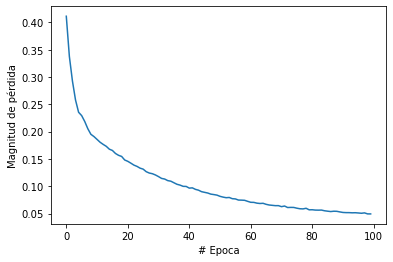

In [67]:
# magnitud de la pérdida de un modelo a lo largo de varias épocas
import matplotlib.pyplot as plt

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])